# MARKETING CAMPAIGN

Predict wether customer will response for the next campaign

Final Project program Bootcamp Datascience Rakamin Batch 28.

By :
- Suci Share Putri
- M. Nafiul Ahkam
- M. Malik
- M. Afif Hibban
- Aminuddin
- Ramadhani Yovita H
- Suci Rahmadiani



# Goals And Objective

1. Problem <br>
  Campaign yang dilakukan sebuah perusahaan retail kurang efektif, terlihat dari respon campaign hanya mencapai 14.91%. Hal ini mengakibatkan profit yang didapatkan belum optimal. 
  <br>

2. Goals <br>
  Mengoptimalkan profit dengan membuat campaign yang lebih tepat sasaran. 
    <br>
3. Objective <br>
  Membuat model machine learning untuk memprediksi customer yang kemungkinan besar akan menerima promosi tertentu sehingga menjadikan campaign lebih tepat sasaran dan mendapatkan profit yang optimal
 <br>
4. Business Metrics 
  - Profit 

# A. Exploratory Data Analysis

### Import library dan baca dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/mmalik17/marketing-campaign-analysis/main/marketing_campaign.csv'
df = pd.read_csv(url, sep = ';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 1. Descriptive Statistics

Cek kesesuaian dataset

- kesesuaian nama kolom dan isi
- kesesuaian nama kolom dan tipedata
- cek missing value

### a. Check kesesuaian kolom dan isi

In [ ]:
# sampling beberapa isi kolom 
pd.set_option('max_columns', None)
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
793,11075,1978,Graduation,Married,51267.0,1,1,2013-10-29,37,183,2,64,7,2,12,4,3,3,5,4,0,0,0,0,0,0,3,11,0
1411,9121,1972,Graduation,Married,80134.0,1,0,2013-05-20,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,3,11,1
1314,8789,1989,2n Cycle,Married,59060.0,1,0,2014-01-11,77,35,40,111,36,40,12,3,3,1,7,4,0,0,0,0,0,0,3,11,0
222,4785,1970,PhD,Together,77622.0,0,2,2014-04-14,3,520,7,154,19,0,14,2,6,3,11,3,0,0,0,0,0,0,3,11,0
1637,10711,1945,Graduation,Married,69755.0,0,0,2013-10-02,23,217,77,373,111,23,93,1,3,6,12,1,0,0,0,0,0,0,3,11,0


In [ ]:
# Cek jumlah fitur dan baris

print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 2240
Total Features : 29


### b. Check Dtypes

In [ ]:
# cek kesesuaian dtype pada tiap kolom 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### c. Check Missing Values

In [ ]:
#cek missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#summary data Info
list = []

for col in df.columns:
    list.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique()])
df_summary = pd.DataFrame(data=list, columns=['feature', 'data_type', 'null_num','%null','nunique'])
df_summary

,feature,data_type,null_num,%null,nunique
0,ID,int64,0,0.000000,2240
1,Year_Birth,int64,0,0.000000,59
2,Education,object,0,0.000000,5
3,Marital_Status,object,0,0.000000,8
4,Income,float64,24,1.071429,1974
5,Kidhome,int64,0,0.000000,3
6,Teenhome,int64,0,0.000000,3
7,Dt_Customer,object,0,0.000000,663
8,Recency,int64,0,0.000000,100
9,MntWines,int64,0,0.000000,776


### d. Check Duplicated

In [ ]:
df.duplicated().any()

False

In [ ]:
df.duplicated().sum()

0

menggunakan fungsi `.info() ` dan `.sample()` diketahui bahwa:

*   Terdapat 2240 baris data  
*   Terdapat 29 kolom dimana : 3 jenis kategori, 26 jenis numerik
* kolom `Dt_Customer` berisi nilai date dan akan diubah menjadi tipe *datetime*
*   Terdapat 24 nilai kosong (1.07 %) pada kolom `income`
* Nama, tipe data serta isi kolom lainnya sudah sesuai

### e. Statistical Summary


In [ ]:
#pisahkan berdasarkan dtypes

num_dtypes = ['int64','float64']
num_df = df.select_dtypes(include = num_dtypes)


numericals = num_df.columns

categoricals = ['Education', 'Marital_Status', 'Dt_Customer']

# statistical summary untuk kolom numerical
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df[categoricals].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


Terdapat 8 nilai unique pada kolom `Marital_Status`. 

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Kesimpulan statistik menggunakan fungsi `.describe()`

- Pada kolom `Income` data maksimal 666666, sementara 75% data hanya mencapai 68522, hal ini menandakan adanya outlier yang sangat besar. 
- Pada `Year-Birth`, terdapat data yang memiliki rentang jauh lebih kecil dari Q1
- `Z_CostContact` dan `Z_Revenue` memiliki nilai berupa konstanta ( nilai tetap) 
- `Marital_Status` memiliki 8 nilai unique dengan 3 nilai yang kurang sesuai (YOLO, Alone, Absurd).
- `Education` memiliki kategori yang mengarah pada hal yang sama ; 2n Cycle = Master

## 2. Univariate Analysis

Melakukan analisis tiap kolom dan melihat distribusi secara detail.

### a. Boxplot

Melihat sebaran data menggunakan boxplot

In [ ]:
len(numericals)

26

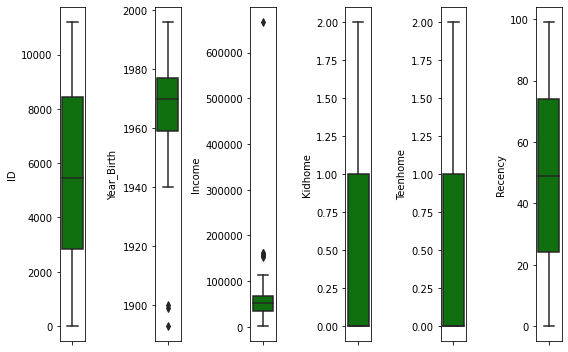

In [ ]:
features = numericals[0:6]
plt.figure(figsize = (8,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

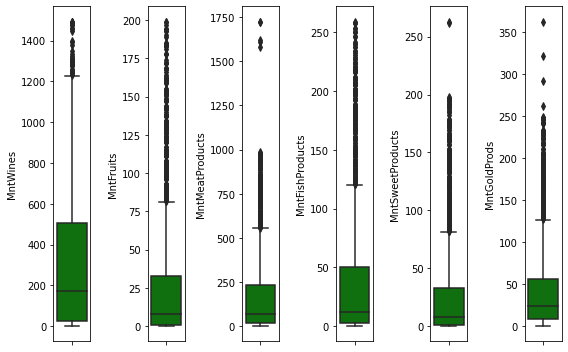

In [ ]:
features = numericals[6:12]
plt.figure(figsize = (8,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

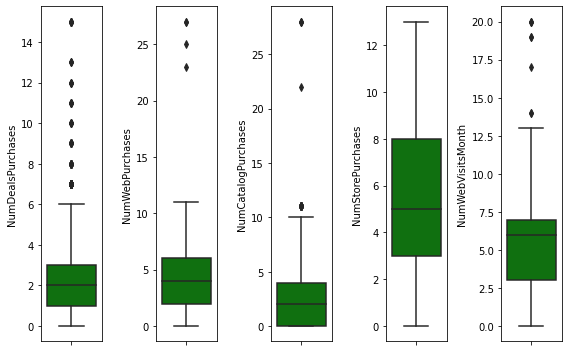

In [ ]:
features = numericals[12:17]
plt.figure(figsize = (8,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

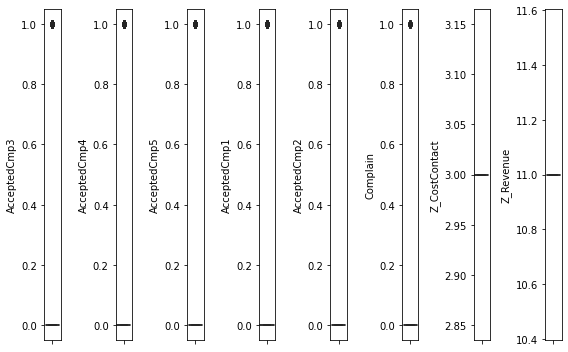

In [ ]:
features = numericals[17:25]
plt.figure(figsize = (8,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

Berdasarkan tampilan boxplot :
- Data yang tidak  memiliki outlier : `Kidhome`, `Teenhome`, `Recency` dan `Numstorepurchase`
- Outlier sangat besar : `Income` dan `Year_Birth`
- Kolom `AcceptedCmp*` dan kolom `Complain` bernilai biner
- Kolom selain itu memiliki outlier namun tidak terlalu besar
- Kolom Z-revenue dan costcampaign bernilai tunggal


### b. Kdeplot

Cek sebaran menggunakan Kdeplot

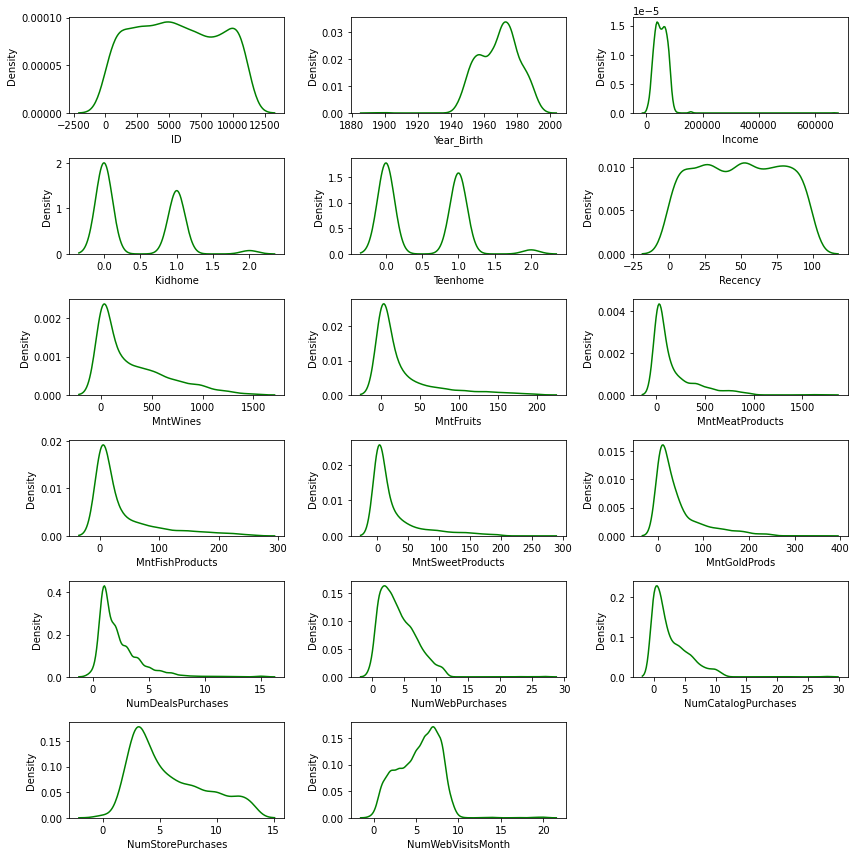

In [ ]:

plt.figure(figsize= (12, 12))
features = numericals[0:17]
for i in range(0, len(features)):
  plt.subplot( 6, 3, i+1)
  sns.kdeplot(x=df[features[i]], color= 'green')
  
  plt.xlabel(features[i])
  plt.tight_layout()
  

Berdasarkan grafik maka sebaran data : 
- Binomial : `Kidhome` dan `Teenhome`
- Distribusi Normal : `ID` dan `Recency`
- Positive Skewed : grafik selain `Kidhome`, `Teenhome`, `ID` dan `Recency`

### c. Distribusi kolom categorical

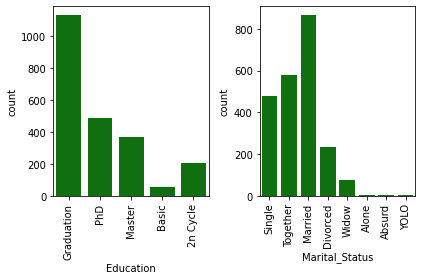

In [ ]:
# sebaran data categoricals
for i in range(0, len(categoricals)):
  plt.subplot(1, len(categoricals), i+1)
  sns.countplot(x= df[categoricals[i]], color = 'green')
  plt.tight_layout()
  plt.xticks( rotation = 90 )



### d. Countplot Label Response

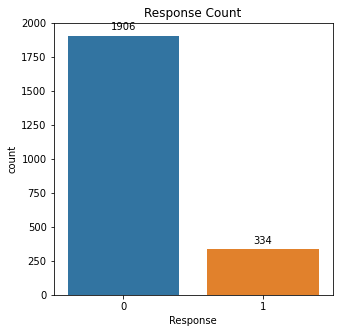

In [ ]:
#sebaran response
plt.figure(figsize=(5,5))
r_plot = sns.countplot(df.Response)

for i in r_plot.patches: 
  r_plot.annotate(format(i.get_height()), (i.get_x()+ i.get_width()/2., i.get_height()),
  ha = 'center', va= 'center',
  xytext = (0,9),
  textcoords = 'offset points')
plt.title('Response Count')
plt.show()


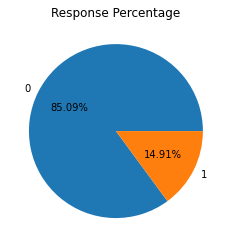

In [ ]:
plt.title("Response Percentage")
respon_rate = (df.groupby('Response').size() / df['Response'].count()) *100

plt.pie(respon_rate, labels=[0,1],autopct='%1.2f%%', data=df)
plt.show()

Target / label yang digunakan adalah `Response` :

- Perbandingan response diterima dan tidak adalah 334 : 1906 
- Rasio respon yang diterima adalah 14,91%
- Data imbalance pada tingkat moderate 

## 3. Multivariate Analysis

### a. Correlation Heatmap

Nilai korelasi berbagai fitur menggunakan correlation heatmap

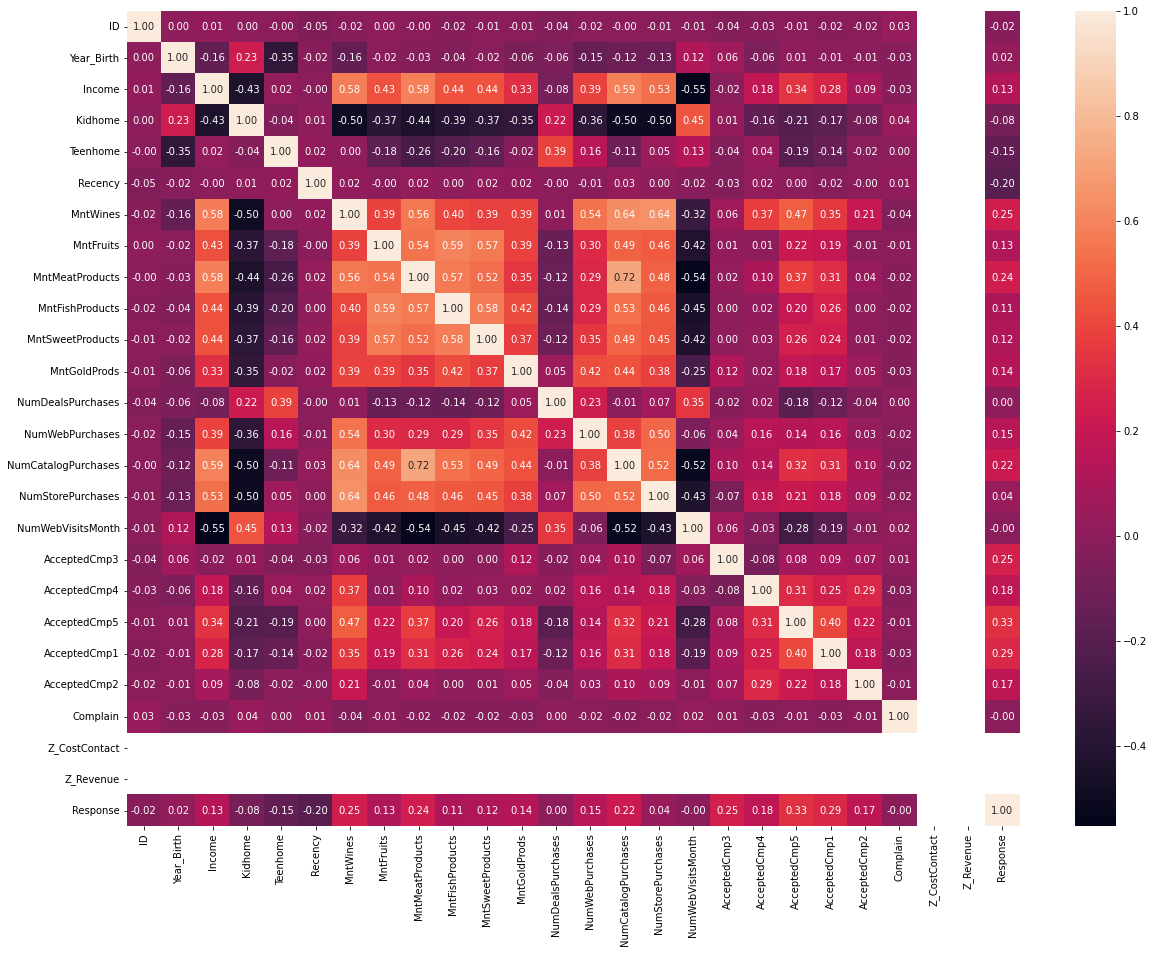

In [ ]:
plt.figure(figsize= (20,15))
sns.heatmap(df.corr(), annot = True, fmt = '.2f' )


In [ ]:
k = df.corr()['Response']
k.sort_values(ascending = False)

Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.133047
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
ID                    -0.021968
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Response, dtype: float64

* Tidak ada korelasi linear yang cukup kuat antara tiap feature  terhadap target, karena nilai korelasi pada fitur dan target di bawah 0.5, sehingga feature-feature yang akan dipertahankan baru dapat diketahui setelah perhitungan feature importance
* terdapat fitur-fitur yang memiliki korelasi sedang akan tetapi tidak terdapat fitur-fitur yang multikolinear
* `NumWebVisitMonth` memiliki korelasi negatif terhadap response

### b. Perbandingan fitur-fitur terhadap label

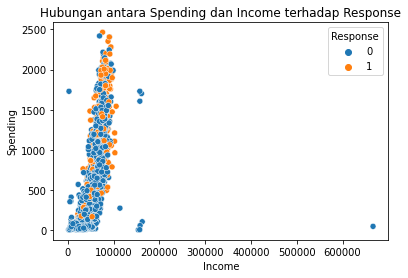

In [ ]:
# Korelasi spending dan income terhadap response
df["Spending"] = df["MntWines"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
sns.scatterplot(x="Income",y='Spending', hue = 'Response', data=df)
plt.title('Hubungan antara Spending dan Income terhadap Response')
plt.show()

Income dan Spending memiliki korelasi positif pada response, dimana semakin tinggi nilai income dan spending semakin besar tingkat respon sehingga fitur income dan spending perlu dipertahankan

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df["Year_Customer"] = df["Dt_Customer"].apply(lambda x: x.year)

df_y = df.groupby(["Year_Customer","Response"])["ID"].nunique().reset_index(name = "Count")
df_y

,Year_Customer,Response,Count
0,2012,0,362
1,2012,1,132
2,2013,0,1035
3,2013,1,154
4,2014,0,509
5,2014,1,48


In [ ]:
# membuat dataframe baru dari year customer dengan response
df_YC = pd.pivot_table(df_y,
                            index = ['Year_Customer'],
                            columns = ['Response'],
                            values = ['Count'])
df_YC = df_YC.reset_index()
df_YC.columns = ['Year_Customer', 'AResponse', 'Response']

df_YC['Total_response'] = df_YC['AResponse'] + df_YC['Response']
df_YC['Percentage']= round((df_YC['Response']/df_YC['Total_response']) * 100, 2)
df_YC

,Year_Customer,AResponse,Response,Total_response,Percentage
0,2012,362,132,494,26.72
1,2013,1035,154,1189,12.95
2,2014,509,48,557,8.62


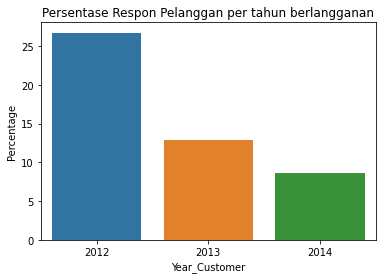

In [ ]:
# persentase respon pelanggan berdasarkan tahun mulai berlangganan
sns.barplot (x = 'Year_Customer', y='Percentage', data=df_YC)
plt.title("Persentase Respon Pelanggan per tahun berlangganan")
plt.show()

Semakin lama customer berlangganan, semakin besar kemungkinan response terhadap campaign.

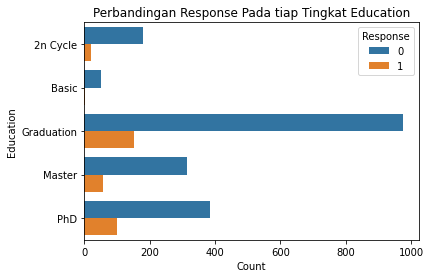

In [ ]:
#perbandingan respon pada tiap tingkat education
dfe = df.groupby(["Education","Response"])["ID"].nunique().reset_index(name = "Count")

sns.barplot(y="Education",x="Count",hue="Response", data=dfe)
plt.title('Perbandingan Response Pada tiap Tingkat Education')
plt.show()

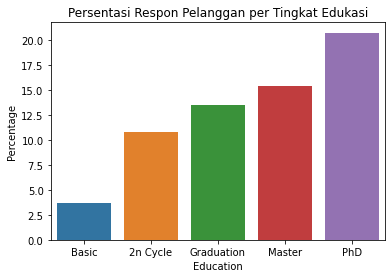

In [ ]:
#persentase respon pelanggan pada tiap tingkat edukasi
df_Education = pd.pivot_table(dfe,
                            index = ['Education'],
                            columns = ['Response'],
                            values = ['Count'])
df_Education = df_Education.reset_index()
df_Education.columns = ['Education', 'AResponse', 'Response']

df_Education['Total_Response'] = df_Education['AResponse'] + df_Education['Response']
df_Education['Percentage']= round((df_Education['Response']/df_Education['Total_Response'] * 100),2)
df_ER = df_Education.sort_values(by = ['Percentage'] , ascending = True)

sns.barplot (x = 'Education', y='Percentage', data=df_ER)
plt.title("Persentasi Respon Pelanggan per Tingkat Edukasi")
plt.show()


Customer dengan tingkat pendidikan yang lebih tinggi memiliki tingkat response yang lebih besar.

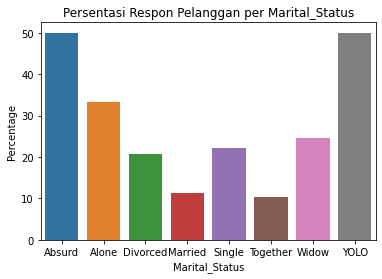

In [ ]:
#persentase respon pelanggan pada tiap marital status
dfm=  df.groupby(["Marital_Status","Response"])["ID"].nunique().reset_index(name = "Count")

df_marital = pd.pivot_table(dfm,
                            index = ['Marital_Status'],
                            columns = ['Response'],
                            values = ['Count'])
df_marital = df_marital.reset_index()
df_marital.columns = ['Marital_Status', 'AResponse', 'Response']
df_marital['Total_Response'] = df_marital['AResponse'] + df_marital['Response']
df_marital['Percentage']= round((df_marital['Response']/df_marital['Total_Response'])*100, 2)

sns.barplot (x = 'Marital_Status', y='Percentage', data=df_marital)
plt.title("Persentasi Respon Pelanggan per Marital_Status")
plt.show()

* Terdapat banyak nilai kategori dan terdapat kategori yang not make sense, seperti 'Absurd', 'Alone', 'YOLO' sehingga tidak belum dapat diambil insight. 
* Kategori dalam `Marital_Status` akan disederhanakan menjadi dua kategori saja : single and not single

### c. Perbandingan Antar Fitur


**Rasio Penerimaan Pada Setiap Campaign**

In [ ]:
# Membuat Acceptance Rate dari setiap campaign

AR1 = (df['AcceptedCmp1'].sum()/len(df) ) * 100
AR2 = (df['AcceptedCmp2'].sum()/len(df) ) * 100
AR3 = (df['AcceptedCmp3'].sum()/len(df) ) * 100
AR4 = (df['AcceptedCmp4'].sum()/len(df) ) * 100
AR5 = (df['AcceptedCmp5'].sum()/len(df) ) * 100

# membuat dataframe baru berisi campaign dan acceptance ratenya
ACC = pd.DataFrame({'Campaign': ['1', '2', '3', '4', '5'], 'Acceptance_percentage': [AR1, AR2, AR3, AR4, AR5]})
ACC

,Campaign,Acceptance_percentage
0,1,6.428571
1,2,1.339286
2,3,7.276786
3,4,7.455357
4,5,7.276786


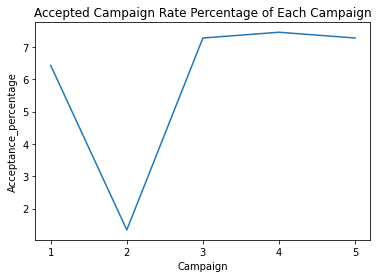

In [ ]:
# Lineplot Acceptance Rate pada tiap campaign
sns.lineplot(data=ACC, x="Campaign", y="Acceptance_percentage")
plt.title ( "Accepted Campaign Rate Percentage of Each Campaign")
plt.show()

* Secara keseluruhan, rasio penerimaan campaign stabil, kecuali pada campaign kedua terdapat penurunan pada campaign kedua menjadi 1.3% dan kembali meningkat pada campaign ke 3. 


**Sebaran Response terhadap Income dan Recency**

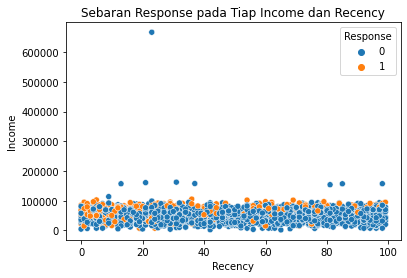

In [ ]:
# sebaran recency dan income terhadap response
sns.scatterplot(x="Recency",y="Income",hue="Response", data=df)
plt.title('Sebaran Response pada Tiap Income dan Recency')
plt.show()

**Hubungan antara Response dengan Jumlah NumDealsPurchase**

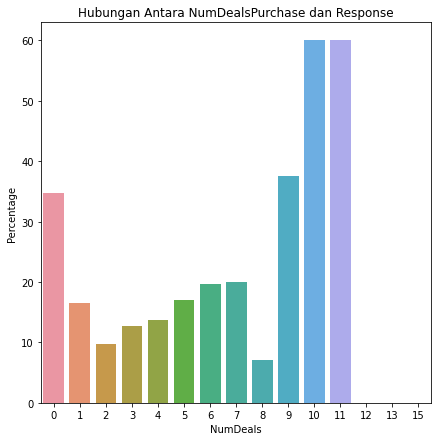

In [ ]:
#  korelasi response dengan numdealspurchase
dfdeals = df.groupby(["NumDealsPurchases","Response"])["ID"].nunique().reset_index(name = "Count")

df_deals = pd.pivot_table(dfdeals,
                          index = ['NumDealsPurchases'],
                          columns = ['Response'],
                          values = ['Count'] )
df_deals = df_deals.reset_index()
df_deals.columns = ['NumDeals', 'AResponse', 'Response']

df_deals['Percentage'] = round((df_deals['Response'] / (df_deals['AResponse'] + df_deals['Response'] )*100),2)

plt.figure(figsize = (7,7))
sns.barplot(x="NumDeals",y="Percentage", data=df_deals)
plt.title('Hubungan Antara NumDealsPurchase dan Response')
plt.show()

* Terdapat kecenderungan kenaikan tingkat response terhadap kenaikan pembelian dengan diskon ( NumDealsPurchase )

**Hubungan antara Response dengan Jumlah NumWebPurchase**

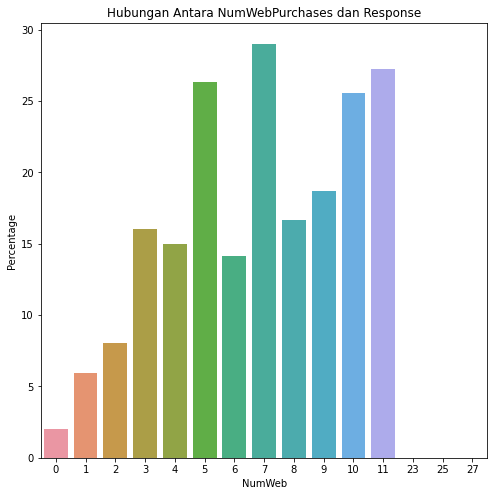

In [ ]:
#  korelasi response dengan numwebspurchase
dfw = df.groupby(["NumWebPurchases","Response"])["ID"].nunique().reset_index(name = "Count")

df_web = pd.pivot_table(dfw,
                          index = ['NumWebPurchases'],
                          columns = ['Response'],
                          values = ['Count'] ) 

df_web = df_web.reset_index()
df_web.columns = ['NumWeb', 'AResponse', 'Response']

df_web['Percentage'] = round((df_web['Response'] / (df_web['AResponse'] + df_web['Response'] )*100),2)

plt.figure(figsize = (8,8))
sns.barplot(x="NumWeb",y="Percentage", data=df_web)

plt.title('Hubungan Antara NumWebPurchases dan Response')
plt.show()

* Persentase respon terhadap pembelian melalui website berdifat fluktuatif dan cenderung naik semakin tinggi pembelian melalui website.

In [ ]:
df6 = df.groupby(["NumCatalogPurchases","Response"])["ID"].nunique().reset_index(name = "Count")

df_cat = pd.pivot_table(df6,
                          index = ['NumCatalogPurchases'],
                          columns = ['Response'],
                          values = ['Count'] )
df_cat = df_cat.reset_index()
df_cat.columns = ['NumCat', 'AResponse', 'Response']

df_cat['Percentage'] = round((df_cat['Response'] / (df_cat['AResponse'] + df_cat['Response'] )*100),2)

df_cat

,NumCat,AResponse,Response,Percentage
0,0,564.0,22.0,3.75
1,1,426.0,71.0,14.29
2,2,237.0,39.0,14.13
3,3,158.0,26.0,14.13
4,4,150.0,32.0,17.58
5,5,110.0,30.0,21.43
6,6,89.0,39.0,30.47
7,7,61.0,18.0,22.78
8,8,40.0,15.0,27.27
9,9,32.0,10.0,23.81


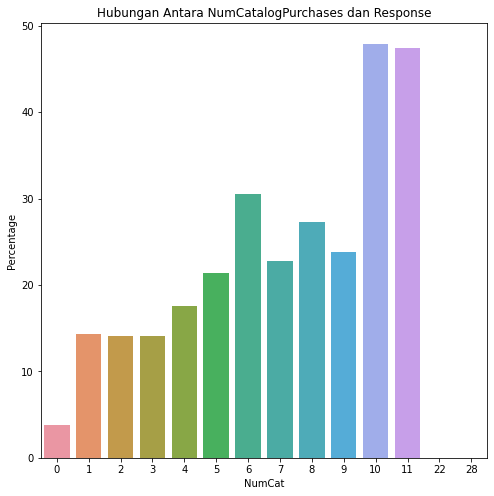

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x="NumCat",y="Percentage", data=df_cat)

plt.title('Hubungan Antara NumCatalogPurchases dan Response')
plt.show()

* Persentase respon terhadap pembelian melalui catalog berdifat fluktuatif dan cenderung naik semakin tinggi pembelian melalui catalog.

# B. Data Pre-Processing

## 1. Pre-processing General

### a. Handling Missing Values

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Spending                0
Year_Customer           0
dtype: int64

In [ ]:
#menghapus nilai null 
df = df.dropna()

* baris kosong pada kolom `Income` dihapus karena jumlah hanya 1.07% kecil dari 10%

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Spending               0
Year_Customer          0
dtype: int64

tidak terdapat missing value

### b. Feature Engineering

#### Kolom Kidsorteen
Menyederhanakan kategori `Kidhome` dan `Teenhome` menjadi kolom `kidsorteen`

In [ ]:
# menggabungkan kolom Kidhome dan Teenhome menjadi kolom kidsorteen
df["kidsorteen"]=np.where((df["Kidhome"]+df["Teenhome"])!=0,1,0)

#### Kolom Marital_Status
Menyederhanakan kategori marital status menjadi 2 kategori sekaligus me-encodingnya

In [ ]:
map_marital = { 'Single' : 0,
               'Alone' : 0,
               'Absurd' : 0,
               'Divorced' : 0,
               'YOLO' : 0,
               'Widow' : 0,
               'Together' : 1,
               'Married' : 1 } 

df['Marital_Status'] = df['Marital_Status'].map(map_marital)

#### Kolom Education
Menyatukan kategori 2nCyle dan Master karena ia bermakna sama.

In [ ]:
edu = { 'Basic' : 'Basic', '2n Cycle':'Master', 'Graduation' :'Graduation',
       'Master' : 'Master', 'PhD' : 'PhD'}
df['Education'] = df['Education'].map(edu)


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Year_Customer,kidsorteen
0,5524,1957,Graduation,0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1529,2012,0
1,2174,1954,Graduation,0,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,26,2014,1
2,4141,1965,Graduation,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,727,2013,0
3,6182,1984,Graduation,1,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,49,2014,1
4,5324,1981,PhD,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,379,2014,1


#### Kolom Generasi

Membuat kolom generasi berdasarkan kriteria: 
- year_birth < 1965 : Boomer
- year_birth < 1981 : Gen - X
- year_birth < 1997 : Millenial

In [ ]:
conditions = [
    (df['Year_Birth'] < 1965), 
    (df['Year_Birth'] < 1981),
    (df['Year_Birth'] < 1997)]
generation = ['Boomer','Gen-X','Millenial']
df['Generasi'] = np.select(conditions, generation, default = df['Year_Birth'])


#### Kolom Year_Customer
Me-encode customer berdasarkan tahun bergabung

In [ ]:
ycust  = { 2012: 0, 2013: 1, 2014: 2}
df['Year_Customer'] = df['Year_Customer'].map(ycust)

#### Kolom Campaign result
Menggabungkan seluruh campaign menjadi satu kolom bernama `campaign-result`

In [ ]:
df['campaign_result'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'])

#### One-hot Encoding

Melakukan OHE pada feature `Education` dan `Generasi`

In [ ]:
for cat in ['Education', 'Generasi']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)
    df = df.drop(columns=cat)

In [ ]:
pd.set_option('display.max_columns',0)
df.head(3)

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Year_Customer,kidsorteen,campaign_result,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Generasi_Boomer,Generasi_Gen-X,Generasi_Millenial
0,5524,1957,0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1529,0,0,0,0,1,0,0,1,0,0
1,2174,1954,0,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,26,2,1,0,0,1,0,0,1,0,0
2,4141,1965,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,727,1,0,0,0,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2216 non-null   int64         
 1   Year_Birth            2216 non-null   int64         
 2   Marital_Status        2216 non-null   int64         
 3   Income                2216 non-null   float64       
 4   Kidhome               2216 non-null   int64         
 5   Teenhome              2216 non-null   int64         
 6   Dt_Customer           2216 non-null   datetime64[ns]
 7   Recency               2216 non-null   int64         
 8   MntWines              2216 non-null   int64         
 9   MntFruits             2216 non-null   int64         
 10  MntMeatProducts       2216 non-null   int64         
 11  MntFishProducts       2216 non-null   int64         
 12  MntSweetProducts      2216 non-null   int64         
 13  MntGoldProds      

 Drop Unnecessary columns

In [ ]:
df = df.drop(['ID','MntWines','MntMeatProducts','MntGoldProds','MntFruits',
              'MntSweetProducts','MntFishProducts', 'AcceptedCmp1',
              'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
              'Kidhome', 'Teenhome', 'Year_Birth',
              'Z_CostContact', 'Z_Revenue',
              'Dt_Customer'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marital_Status        2216 non-null   int64  
 1   Income                2216 non-null   float64
 2   Recency               2216 non-null   int64  
 3   NumDealsPurchases     2216 non-null   int64  
 4   NumWebPurchases       2216 non-null   int64  
 5   NumCatalogPurchases   2216 non-null   int64  
 6   NumStorePurchases     2216 non-null   int64  
 7   NumWebVisitsMonth     2216 non-null   int64  
 8   Complain              2216 non-null   int64  
 9   Response              2216 non-null   int64  
 10  Spending              2216 non-null   int64  
 11  Year_Customer         2216 non-null   int64  
 12  kidsorteen            2216 non-null   int64  
 13  campaign_result       2216 non-null   int64  
 14  Education_Basic       2216 non-null   uint8  
 15  Education_Graduation 

## 2. Split Train Test

In [ ]:
X = df.drop(columns = ['Response'])
Y = df['Response']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Pre-processing train data

Cek sebaran train dataset

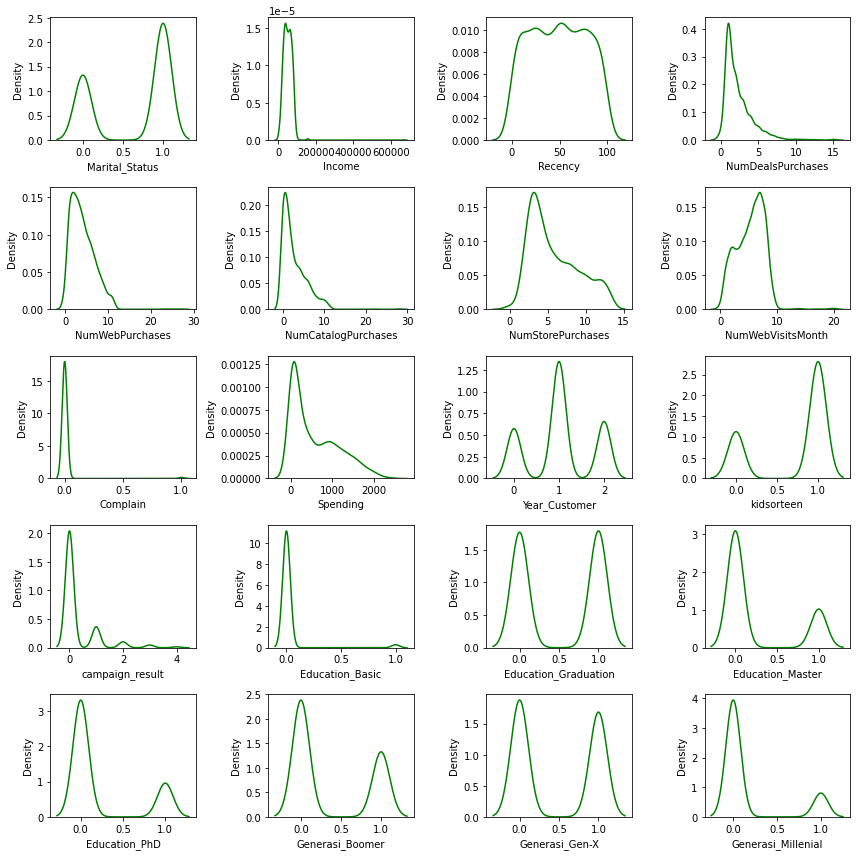

In [ ]:
numerical = X_train.columns.to_list()

plt.figure(figsize= (12, 12))
for i in range(0, len(numerical)):
  plt.subplot( 5, 4, i+1)
  sns.kdeplot(x=X_train[numerical[i]], color= 'green')
  
  plt.xlabel(numerical[i])
  plt.tight_layout()

#### Handling Outlier
Kolom yang memiliki outlier akan dihandle menggunakan metode z-score

In [ ]:
#menggabungkan x_train dan y_train 
train_df = pd.concat([X_train, y_train], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 209 to 873
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marital_Status        1772 non-null   int64  
 1   Income                1772 non-null   float64
 2   Recency               1772 non-null   int64  
 3   NumDealsPurchases     1772 non-null   int64  
 4   NumWebPurchases       1772 non-null   int64  
 5   NumCatalogPurchases   1772 non-null   int64  
 6   NumStorePurchases     1772 non-null   int64  
 7   NumWebVisitsMonth     1772 non-null   int64  
 8   Complain              1772 non-null   int64  
 9   Spending              1772 non-null   int64  
 10  Year_Customer         1772 non-null   int64  
 11  kidsorteen            1772 non-null   int64  
 12  campaign_result       1772 non-null   int64  
 13  Education_Basic       1772 non-null   uint8  
 14  Education_Graduation  1772 non-null   uint8  
 15  Education_Master    

In [ ]:
from scipy import stats

outlier = ['Income','Spending','Recency','NumDealsPurchases','NumWebPurchases',
           'NumWebVisitsMonth' , 'NumCatalogPurchases', 'NumStorePurchases']

z_scores = np.abs(stats.zscore(train_df[outlier]))
train_df = train_df[(z_scores < 3).all(axis=1)]

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 209 to 873
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marital_Status        1732 non-null   int64  
 1   Income                1732 non-null   float64
 2   Recency               1732 non-null   int64  
 3   NumDealsPurchases     1732 non-null   int64  
 4   NumWebPurchases       1732 non-null   int64  
 5   NumCatalogPurchases   1732 non-null   int64  
 6   NumStorePurchases     1732 non-null   int64  
 7   NumWebVisitsMonth     1732 non-null   int64  
 8   Complain              1732 non-null   int64  
 9   Spending              1732 non-null   int64  
 10  Year_Customer         1732 non-null   int64  
 11  kidsorteen            1732 non-null   int64  
 12  campaign_result       1732 non-null   int64  
 13  Education_Basic       1732 non-null   uint8  
 14  Education_Graduation  1732 non-null   uint8  
 15  Education_Master    

Memisahkan kembali feature dan label

In [ ]:
X_train = train_df.drop('Response', axis = 1)
y_train = train_df['Response']



#### Logistic Transformation

Nilai Mininmum Kolom
 NumStorePurchases : Income                 7500.1
Spending                  8.1
NumDealsPurchases         0.1
NumCatalogPurchases       0.1
NumStorePurchases         2.1
dtype: float64


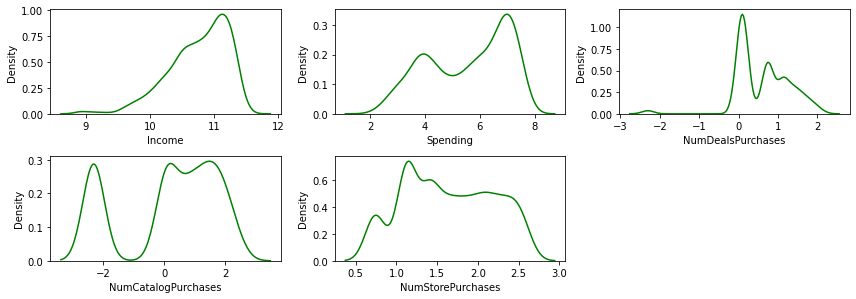

In [ ]:
#menggeser sebaran grafik seluruh kolom agar tidak terdapat

logt = ['Income', 'Spending', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

for c in logt: 
    X_train[c] = X_train[c].apply(lambda x : x + 0.1)
    X_test[c] = X_test[c].apply(lambda x : x + 0.1)

print('Nilai Mininmum Kolom\n', c,':', X_train[logt].min())

# log transformation
for c in logt :
    X_train[c] = np.log(X_train[c])
    X_test[c] = np.log(X_test[c])

# lihat distribusi di kde plot
plt.figure(figsize= (12, 12))
for i in range(0, len(logt)):
  plt.subplot( 6, 3, i+1)
  sns.kdeplot(x=X_train[logt[i]], color= 'green')
  
  plt.xlabel(logt[i])
  plt.tight_layout()

#### Normalisasi
Normalisasi seluruh data continue

In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm =  X_train.columns.to_list()
mmscaler = MinMaxScaler()
#fit train data
mmscaler.fit(X_train[norm])

#transform train data
X_train[norm] = mmscaler.transform(X_train[norm])
#transform test data
X_test[norm] = mmscaler.transform(X_test[norm])

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_Status,1732.0,0.642032,0.479541,0.0,0.000000,1.000000,1.000000,1.0
Income,1732.0,0.695296,0.176051,0.0,0.588499,0.725692,0.834958,1.0
Recency,1732.0,0.494990,0.290548,0.0,0.242424,0.494949,0.747475,1.0
NumDealsPurchases,1732.0,0.666281,0.155430,0.0,0.545665,0.692811,0.781437,1.0
NumWebPurchases,1732.0,0.369777,0.238190,0.0,0.181818,0.363636,0.545455,1.0
NumCatalogPurchases,1732.0,0.524396,0.337717,0.0,0.000000,0.646460,0.788523,1.0
NumStorePurchases,1732.0,0.489300,0.298600,0.0,0.212744,0.484686,0.737393,1.0
NumWebVisitsMonth,1732.0,0.526501,0.228164,0.0,0.300000,0.600000,0.700000,1.0
Complain,1732.0,0.009815,0.098613,0.0,0.000000,0.000000,0.000000,1.0
Spending,1732.0,0.614210,0.261982,0.0,0.369478,0.675651,0.849691,1.0


#### Handling Class Imbalance


In [ ]:
from imblearn import over_sampling 

X_osr, y_osr = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)

print(y_osr.value_counts())

1    1468
0    1468
Name: Response, dtype: int64


# C. Modelling & Evaluasi

- Pada kasus ini nilai evaluasi yang dipilih adalah recall untuk mengurangi False Negative. 
- Besarnya false negative dapat mengurangi revenue perusahaan

### Function

#### Function Evaluation 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print('Accuracy (Train Set): %.2f' %accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print('Precision (Train Set: %.2f' %precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    #model_in = model(hyper1=1, hyper2=2)
    score = cross_validate(model, X, Y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

#### Learning Curve Logistic Regression

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def draw_learning_curve_lg(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c, max_iter = 1000)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference : '+ str(train_auc - test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

#### Learning Curve Decision Tree

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def draw_learning_curve_dt(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference : '+ str(train_auc - test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Decision Tree')
    plt.legend()
    plt.show()

#### Learning Curve K-Nearest Neighbor

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def draw_learning_curve_kn(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = KNeighborsClassifier()
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference : '+ str(train_auc - test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - KNeighbors Classifier')
    plt.legend()
    plt.show()

#### Learning Curve Random Forest

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def draw_learning_curve_rf(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier()
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference : '+ str(train_auc - test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - RandomForest Classifier')
    plt.legend()
    plt.show()

## 1. Modelling

### a. Logistic Regression

#### Imbalance
Menggunakan model Logistic Regression pada data masih imbalance.

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression(max_iter = 1000) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Confusion Matrix: 
[[367  15]
 [ 40  22]]
Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.90
Precision (Test Set): 0.59
Precision (Train Set: 0.79
Recall (Test Set): 0.35
Recall (Train Set): 0.45
F1-Score (Test Set): 0.44
F1-Score (Train Set): 0.58
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.91
recall (crossval train): 0.19297964011151475
recall (crossval test): 0.18312980551786523


Hasil recall sangat underfit. Hal ini disebabkan karena data moderate imbalance.

In [ ]:
# Weighted Logistic regression
lg2 = LogisticRegression( class_weight = 'balanced', max_iter = 1000)

lg2.fit(X_train, y_train)
eval_classification(lg2)

Confusion Matrix: 
[[304  78]
 [ 12  50]]
Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.82
Precision (Test Set): 0.39
Precision (Train Set: 0.45
Recall (Test Set): 0.81
Recall (Train Set): 0.83
F1-Score (Test Set): 0.53
F1-Score (Train Set): 0.59
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.91
recall (crossval train): 0.7590324124919039
recall (crossval test): 0.7659430122116688


- Hasil recall sudah bestfit, menggunakan parameter 'balanced'. Akan tetapi nilai precision menurun hingga 0.39. 
- Akan dilakukan tuning hyper parameter lebih jauh untuk mendapatkan hasil yang lebih baik. 

In [ ]:
# Tuning hyperparameter
# random search
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2', 'elasticnet']
w = [None, 'balanced']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]

hyperparameters = dict(penalty=penalty, C=C, class_weight = w,)

logreg = LogisticRegression(max_iter = 1000, random_state = 42)
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Confusion Matrix: 
[[302  80]
 [ 10  52]]
Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.82
Precision (Test Set): 0.39
Precision (Train Set: 0.45
Recall (Test Set): 0.84
Recall (Train Set): 0.83
F1-Score (Test Set): 0.54
F1-Score (Train Set): 0.58
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.91
recall (crossval train): 0.7575061248627185
recall (crossval test): 0.7750791497060153


- Nilai recall meningkat menjadi 0.84 sudah bestfit. Parameter ini yang dijadikan sebagai hyperparameter terbaik untuk model logistic regression.


In [ ]:
show_best_hyperparameter(rs)

{'C': 0.44449999999999995, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
lg_best = LogisticRegression(C= 0.41419999999999996, class_weight= 'balanced', dual= False, fit_intercept= True, 
                             intercept_scaling= 1, l1_ratio= None, max_iter= 1000, multi_class= 'auto', n_jobs= None, 
                             penalty= 'l2', random_state= 42, solver= 'lbfgs', tol= 0.0001, verbose= 0, warm_start= False)
lg_best.fit(X_train, y_train)
eval_classification(lg_best)

Confusion Matrix: 
[[302  80]
 [ 10  52]]
Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.82
Precision (Test Set): 0.39
Precision (Train Set: 0.45
Recall (Test Set): 0.84
Recall (Train Set): 0.83
F1-Score (Test Set): 0.54
F1-Score (Train Set): 0.58
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.91
recall (crossval train): 0.7657768015544478
recall (crossval test): 0.7810492989597468


- terdapat perbedaan yang cukup jauh pada nilai recall dan precision. Akan dilakukan pengecekan korelasi antara recall dan precision untuk mendapatkan nilai optimal. 

- **Model Logistic regression ini dipilih diantara selurh model yang dicoba karena memiliki nilai recall tertinggi (bestfit)**

#### OverSampled
Menggunakan model Logistic Regression pada data masih yang sudah di oversampling

In [ ]:
# with oversampler
lg_osr = LogisticRegression( max_iter = 1000)

lg_osr.fit(X_osr, y_osr)
eval_classification(lg_osr)

Confusion Matrix: 
[[305  77]
 [ 12  50]]
Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.82
Precision (Test Set): 0.39
Precision (Train Set: 0.45
Recall (Test Set): 0.81
Recall (Train Set): 0.82
F1-Score (Test Set): 0.53
F1-Score (Train Set): 0.58
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.91
recall (crossval train): 0.19297964011151475
recall (crossval test): 0.18312980551786523


In [ ]:
# Hyperparameter after oversampling

penalty = ['l1', 'l2', 'elasticnet', None]
C = [float(x) for x in np.linspace(0.0001, 3, 100)]

hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(max_iter = 1000, random_state = 42)
rs_ov = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=1, cv=5, n_iter=50)
rs_ov.fit(X_osr, y_osr)
eval_classification(rs_ov)

Confusion Matrix: 
[[301  81]
 [ 11  51]]
Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.83
Precision (Test Set): 0.39
Precision (Train Set: 0.46
Recall (Test Set): 0.82
Recall (Train Set): 0.84
F1-Score (Test Set): 0.53
F1-Score (Train Set): 0.59
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.91
recall (crossval train): 0.2700627974430458
recall (crossval test): 0.24084124830393489


Hasil evaluasi menggunakan data yang sudah dioversampling tidak lebih baik dibanding menggunakan parameter 'balance' pada class_weight

#### Learning Curve Train Test

param value: 0.0001; train: 0.789850136239782; test: 0.7413865901030232; difference : 0.04846354613675874
param value: 0.010199999999999999; train: 0.8283972215341424; test: 0.7870714406350279; difference : 0.04132578089911454
param value: 0.0203; train: 0.8496743662785897; test: 0.8125738895456848; difference : 0.03710047673290495
param value: 0.0304; train: 0.8627280984229213; test: 0.8279429150481338; difference : 0.03478518337478753
param value: 0.0405; train: 0.8715656221616712; test: 0.8382452288464787; difference : 0.03332039331519254
param value: 0.0506; train: 0.8776602881677813; test: 0.84609863198784; difference : 0.03156165617994133
param value: 0.060700000000000004; train: 0.8823022458921641; test: 0.8514186792771491; difference : 0.030883566615015012
param value: 0.0708; train: 0.8861443109569813; test: 0.8561898327985138; difference : 0.029954478158467523
param value: 0.0809; train: 0.8890574684171414; test: 0.860665428137139; difference : 0.028392040280002417
param valu

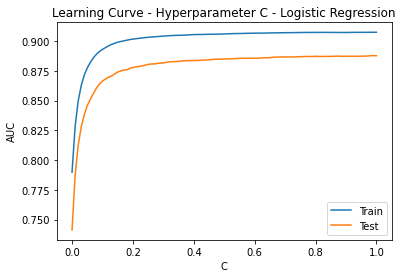

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 1, 100)]
draw_learning_curve_lg(param_values)

#### Precision-Recall Curve

Dilakukan pengecekan korelasi precision-recall untuk mendapatkan nilai precision dan recall yang optimal

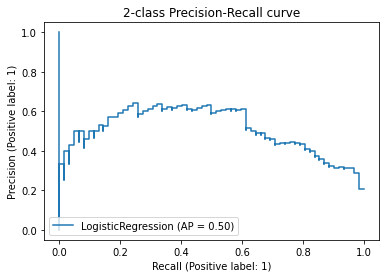

In [ ]:
#2-class Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
classifier.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Tidak terdapat nilai yang cukup optimal untuk precison terhadap recall, sehingga yang evaluasi yang diperhatikan kedepannya fokus hanya kepada recall. 

#### Shap Value

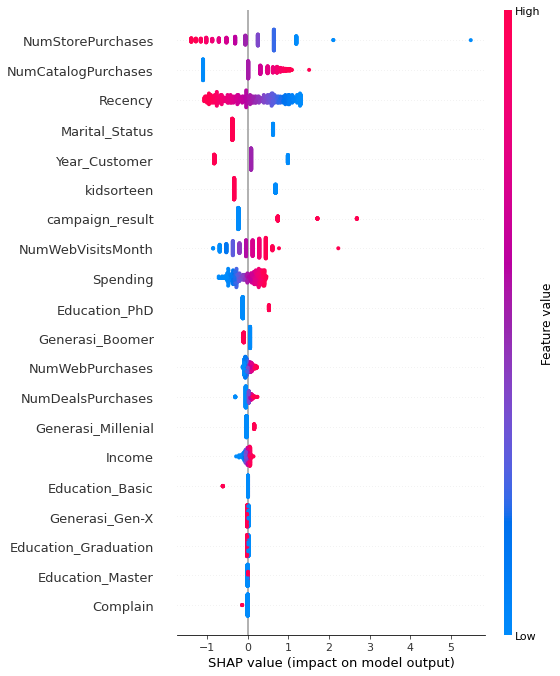

In [ ]:
# Shap Value
import shap
explainer = shap.Explainer(lg_best, X_test)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

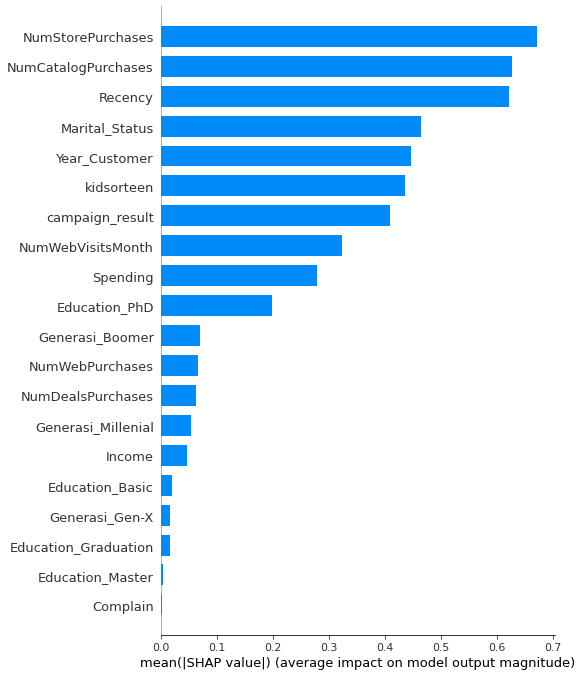

In [ ]:
shap.summary_plot(shap_values, X, plot_type='bar')

* `NumStorePurchase` memiliki korelasi negatif tinggi terhadap response pelanggan 
* `NumCatalogPurchases` memiliki korelasi positif yang tinggi terhadap respon pelanggan
* `Recency` memiliki korelasi positif yang tinggi terhadap respon.
* `Year_Customer` memiliki korelasi negatif terhadap respon

### b. Decision Tree

#### Imbalance
Menggunakan model Decision Tree pada data masih imbalance.

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state=0) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Confusion Matrix: 
[[350  32]
 [ 37  25]]
Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.99
Precision (Test Set): 0.44
Precision (Train Set: 1.00
Recall (Test Set): 0.40
Recall (Train Set): 0.95
F1-Score (Test Set): 0.42
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.66
roc_auc (train-proba): 1.00
recall (crossval train): 0.9542085550956042
recall (crossval test): 0.4592492085029399


Didapatkan hasil recall sangat overfit dimana perbedaan pada evaluasi test dan train mencapai 45%

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np
import warnings
warnings.filterwarnings('ignore')

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] 
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 100]
max_features = ['auto', 'sqrt'] 
criterion = ['gini','entropy']
splitter = ['best','random']


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=0)
gs = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall')
gs.fit(X_train, y_train)
eval_classification(gs)

Confusion Matrix: 
[[337  45]
 [ 36  26]]
Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.99
Precision (Test Set): 0.37
Precision (Train Set: 1.00
Recall (Test Set): 0.42
Recall (Train Set): 0.95
F1-Score (Test Set): 0.39
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.66
roc_auc (train-proba): 1.00
recall (crossval train): 0.8489453972008674
recall (crossval test): 0.366576209859792


- Tidak terjadi perubahan signifikan pada nilai recall. 
- Model decision tree masih sangat underfit.

#### OverSampled
Menggunakan model Decision Tree pada data yang sudah di oversampling

In [ ]:
# with oversampler
dt_osr = DecisionTreeClassifier()

dt_osr.fit(X_osr, y_osr)
eval_classification(dt_osr)

Confusion Matrix: 
[[343  39]
 [ 41  21]]
Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.99
Precision (Test Set): 0.35
Precision (Train Set: 0.95
Recall (Test Set): 0.34
Recall (Train Set): 1.00
F1-Score (Test Set): 0.34
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.62
roc_auc (train-proba): 1.00
recall (crossval train): 0.9542085550956042
recall (crossval test): 0.4621890547263682


In [ ]:
# with best parameter
dtosr = DecisionTreeClassifier(ccp_alpha= 0.0, class_weight = None, criterion ='gini', 
                                  max_features= 'auto', max_leaf_nodes= None, min_impurity_decrease= 0.0, min_samples_leaf= 1, 
                                  min_samples_split= 2, min_weight_fraction_leaf= 0.0, random_state= 0, splitter= 'random')
dtosr.fit(X_osr, y_osr)
eval_classification(dtosr)

Confusion Matrix: 
[[344  38]
 [ 41  21]]
Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.99
Precision (Test Set): 0.36
Precision (Train Set: 0.95
Recall (Test Set): 0.34
Recall (Train Set): 1.00
F1-Score (Test Set): 0.35
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.62
roc_auc (train-proba): 1.00
recall (crossval train): 0.9542085550956042
recall (crossval test): 0.4203980099502488


tidak peningkatan pada nilai recall, akan tetapi model masih sangat underfit.

#### Learning Curve Train Test

param value: 2; train: 0.995227737181075; test: 0.6780104712041886
param value: 9; train: 0.9621289530179176; test: 0.7790702584022968
param value: 16; train: 0.9315614420774501; test: 0.8093227495355515
param value: 23; train: 0.9219020931384692; test: 0.8070638405674717
param value: 30; train: 0.9064680352572041; test: 0.8116872149974668
param value: 37; train: 0.9006301089918256; test: 0.8272040195912853
param value: 44; train: 0.8916893732970027; test: 0.8477664245904407
param value: 51; train: 0.8866810131285607; test: 0.8466053031582502
param value: 58; train: 0.876620427710346; test: 0.8418763722344199
param value: 65; train: 0.8655677173643795; test: 0.8277951359567641
param value: 72; train: 0.8629074291965981; test: 0.8228550920452626
param value: 79; train: 0.8599091218726778; test: 0.8255151156899173
param value: 86; train: 0.8543330959458344; test: 0.8054593818611722
param value: 93; train: 0.8542685884732887; test: 0.805459381861172
param value: 100; train: 0.846983114523

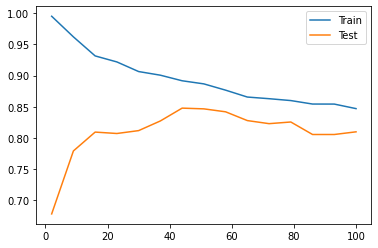

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 100, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = DecisionTreeClassifier( min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Precision-Recall Curve

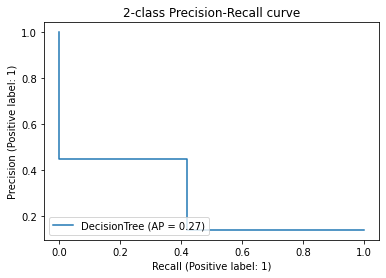

In [ ]:
#2-class Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), DecisionTreeClassifier())
classifier.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="DecisionTree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### Shap Value

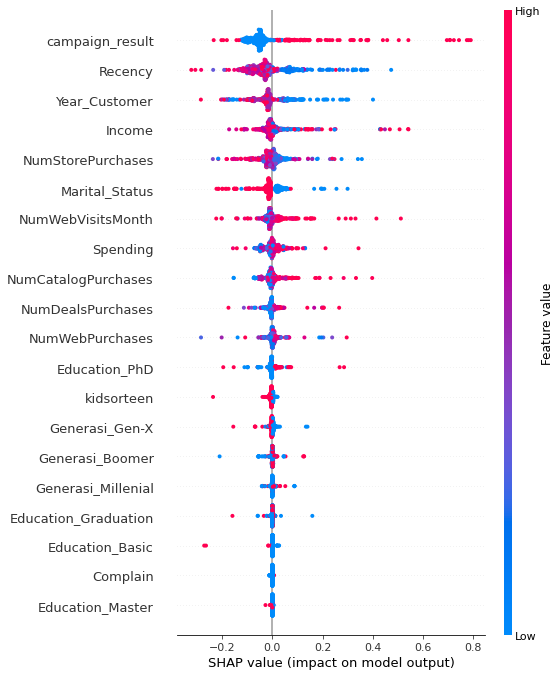

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

### c. Random Forest

#### Imbalance
Menggunakan model Random Forest pada data masih imbalance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Confusion Matrix: 
[[371  11]
 [ 37  25]]
Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.69
Precision (Train Set: 0.98
Recall (Test Set): 0.40
Recall (Train Set): 0.97
F1-Score (Test Set): 0.51
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
recall (crossval train): 0.9624651516431527
recall (crossval test): 0.3752600633197648


Hasil recall pada model ini sangat underfit.

In [ ]:
# tuning hyperparameter RF 
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Confusion Matrix: 
[[374   8]
 [ 45  17]]
Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.92
Precision (Test Set): 0.68
Precision (Train Set: 0.95
Recall (Test Set): 0.27
Recall (Train Set): 0.47
F1-Score (Test Set): 0.39
F1-Score (Train Set): 0.63
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.98
recall (crossval train): 0.46696516572329705
recall (crossval test): 0.29393939393939394


tidak terjadi peningkatan pada nilai recall, dan nilai maasih underfit.

#### OverSampled
Menggunakan model Random Forest pada data yang sudah di oversampling

In [ ]:
# with oversampler
rf = RandomForestClassifier()
rf.fit(X_osr, y_osr)
eval_classification(rf)

Confusion Matrix: 
[[365  17]
 [ 36  26]]
Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.99
Precision (Test Set): 0.60
Precision (Train Set: 0.95
Recall (Test Set): 0.42
Recall (Train Set): 1.00
F1-Score (Test Set): 0.50
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00
recall (crossval train): 0.9669707977809692
recall (crossval test): 0.36318407960199


In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_osr, y_osr)
eval_classification(rs)

Confusion Matrix: 
[[339  43]
 [ 20  42]]
Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.96
Precision (Test Set): 0.49
Precision (Train Set: 0.81
Recall (Test Set): 0.68
Recall (Train Set): 0.97
F1-Score (Test Set): 0.57
F1-Score (Train Set): 0.88
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.99
recall (crossval train): 0.46696516572329705
recall (crossval test): 0.29393939393939394


Hasil terbaik pada model ini didapatkan dari hyperparameter tuning untuk model yang sudah di oversampling. Akan tetapi, nilai recall test set 0.68 masih sangat underfit dan nilai recall train set 0.98 (overfit)

#### Learning Curve Train Test

param value: 2; train: 0.998379572289654; test: 0.8844367505488938
param value: 9; train: 0.9618631822310296; test: 0.8879412261442324
param value: 16; train: 0.9422941953595905; test: 0.8737544333727412
param value: 23; train: 0.9287940715052432; test: 0.8772589089680797
param value: 30; train: 0.9200416976302535; test: 0.8742188819456173
param value: 37; train: 0.9084122904797292; test: 0.8547120418848168
param value: 44; train: 0.9013758153744531; test: 0.8651832460732983
param value: 51; train: 0.89314208157873; test: 0.8548387096774194
param value: 58; train: 0.8854785938403105; test: 0.8501942239486573
param value: 65; train: 0.8884278754850962; test: 0.8574565107245398
param value: 72; train: 0.8774125794732062; test: 0.843396385745651
param value: 79; train: 0.8722855255552803; test: 0.8422141530146936
param value: 86; train: 0.8719836305837668; test: 0.8514609018746834
param value: 93; train: 0.8612237841631574; test: 0.8355852052018241
param value: 100; train: 0.8625577986954

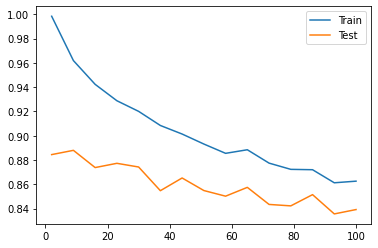

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 100, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Precision-Recall Curve

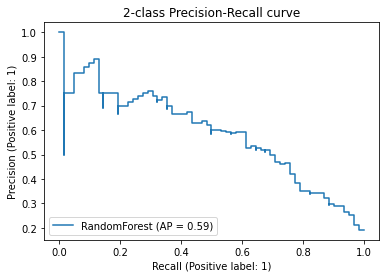

In [ ]:
#2-class Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), RandomForestClassifier())
classifier.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="RandomForest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### Shap Value

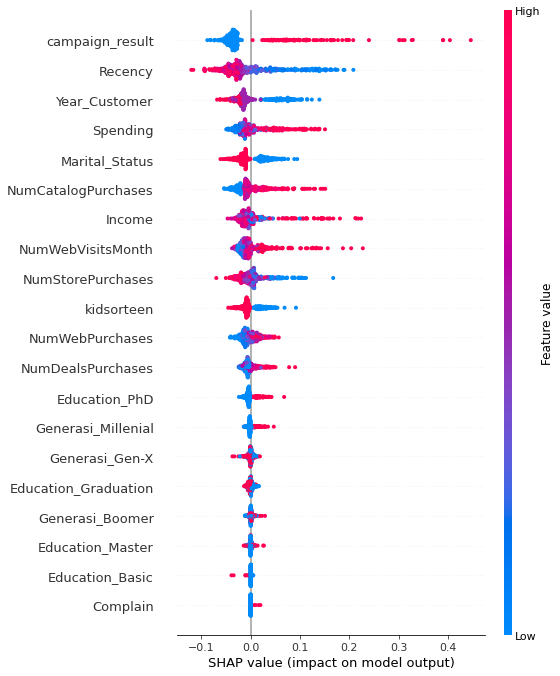

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positiv



### d. K-Nearest Neighbors

#### Imbalance
Menggunakan model K-Nearest Neighbor pada data yang masih imbalance.

In [ ]:
#k-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Confusion Matrix: 
[[373   9]
 [ 49  13]]
Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.89
Precision (Test Set): 0.59
Precision (Train Set: 0.85
Recall (Test Set): 0.21
Recall (Train Set): 0.37
F1-Score (Test Set): 0.31
F1-Score (Train Set): 0.52
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.94
recall (crossval train): 0.29129565486750586
recall (crossval test): 0.12012663952962459


In [ ]:
# Hyperparameter k-Nearest Neighbor 
n_neighbors = [30,100,75,5,4,3,2,1]
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

knn.fit(X_train, y_train)
knn = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=1, cv=5)
knn.fit(X_train, y_train)
eval_classification(knn)

Confusion Matrix: 
[[351  31]
 [ 43  19]]
Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.99
Precision (Test Set): 0.38
Precision (Train Set: 0.99
Recall (Test Set): 0.31
Recall (Train Set): 0.96
F1-Score (Test Set): 0.34
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.61
roc_auc (train-proba): 0.98
recall (crossval train): 0.9549604347948524
recall (crossval test): 0.29131614654002713


NIlai recall yang didapat sangat rendah karena data masih imbalance dan model bias terhadap label dominan.

#### OverSampled
Menggunakan model K-Nearest Neighbor pada data yang sudah di oversampling

In [ ]:
# with oversampler
knno = KNeighborsClassifier()
knno.fit(X_osr, y_osr)
eval_classification(knno)

Confusion Matrix: 
[[304  78]
 [ 26  36]]
Accuracy (Test Set): 0.77
Accuracy (Train Set): 0.89
Precision (Test Set): 0.32
Precision (Train Set: 0.57
Recall (Test Set): 0.58
Recall (Train Set): 0.98
F1-Score (Test Set): 0.41
F1-Score (Train Set): 0.72
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.99
recall (crossval train): 0.29129565486750586
recall (crossval test): 0.12012663952962459


Terdapat pengingkatan nilai recall, akan tetapi model masih sangat underfit.

#### Learning Curve Train Test

param value: 1; train: 0.9800388076954835; test: 0.6126498902212464
param value: 2; train: 0.9754974816282719; test: 0.6578280695828408
param value: 3; train: 0.9648176244736191; test: 0.7068485053200473
param value: 4; train: 0.9466948951366526; test: 0.7093185272757979
param value: 5; train: 0.9392571835521426; test: 0.7738768789055902
param value: 6; train: 0.9309641028816777; test: 0.7677968248606655
param value: 7; train: 0.9250745706382627; test: 0.7682612734335416
param value: 8; train: 0.918812185203534; test: 0.7813713899679109
param value: 9; train: 0.9087954648666502; test: 0.7809069413950345
param value: 10; train: 0.9009139418710264; test: 0.785825874007769
param value: 11; train: 0.8996483052596813; test: 0.7897947981759839
param value: 12; train: 0.898400730740649; test: 0.7907448066205033
param value: 13; train: 0.8956436813640491; test: 0.797648201317345
param value: 14; train: 0.8899399306415655; test: 0.7886336767437934
param value: 15; train: 0.8881891978366774; tes

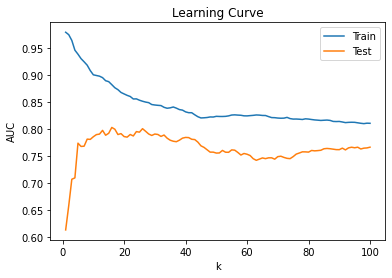

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

#### Precision-Recall Curve

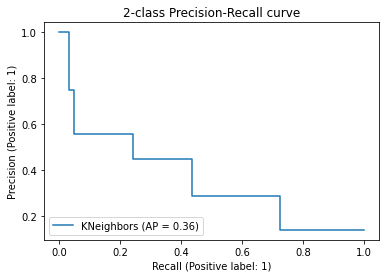

In [ ]:
#2-class Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())
classifier.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="KNeighbors"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### e. AdaBoost

#### Imbalance
Menggunakan model boosting Adaboost pada data masih imbalance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Confusion Matrix: 
[[358  24]
 [ 30  32]]
Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.90
Precision (Test Set): 0.57
Precision (Train Set: 0.74
Recall (Test Set): 0.52
Recall (Train Set): 0.53
F1-Score (Test Set): 0.54
F1-Score (Train Set): 0.62
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.93
recall (crossval train): 0.5322745064909464
recall (crossval test): 0.4922207146087743


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Confusion Matrix: 
[[361  21]
 [ 33  29]]
Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.91
Precision (Test Set): 0.58
Precision (Train Set: 0.80
Recall (Test Set): 0.47
Recall (Train Set): 0.52
F1-Score (Test Set): 0.52
F1-Score (Train Set): 0.63
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.94
recall (crossval train): 0.505249077750556
recall (crossval test): 0.4502487562189055


Nilai recall underfit. 

#### OverSampled
Menggunakan model Boosting Adaboost pada data yang sudah di oversampling

In [ ]:
# with oversampler
abo = AdaBoostClassifier()
abo.fit(X_osr, y_osr)
eval_classification(abo)

Confusion Matrix: 
[[314  68]
 [ 16  46]]
Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.85
Precision (Test Set): 0.40
Precision (Train Set: 0.51
Recall (Test Set): 0.74
Recall (Train Set): 0.83
F1-Score (Test Set): 0.52
F1-Score (Train Set): 0.63
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.93
recall (crossval train): 0.5322745064909464
recall (crossval test): 0.4922207146087743


Terdapat peningkatan nilai recall yang cukup signifikan, akan tetapi hasil ini tidak sebaik menggunakan model logistic regression.

#### Precision-Recall Curve

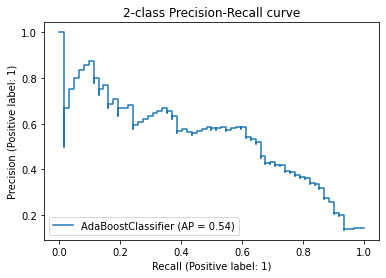

In [ ]:
#2-class Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), AdaBoostClassifier())
classifier.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="AdaBoostClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Tidak dapat diambil nilai optimaul untuk precision dan recall.

### f. XGBoost

#### Imbalance
Menggunakan model Boosting XGBoost pada data masih imbalance.

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Confusion Matrix: 
[[369  13]
 [ 34  28]]
Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.94
Precision (Test Set): 0.68
Precision (Train Set: 0.93
Recall (Test Set): 0.45
Recall (Train Set): 0.62
F1-Score (Test Set): 0.54
F1-Score (Train Set): 0.75
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.97
recall (crossval train): 0.6088620427473177
recall (crossval test): 0.42315694255992764


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Confusion Matrix: 
[[361  21]
 [ 35  27]]
Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.99
Precision (Test Set): 0.56
Precision (Train Set: 0.99
Recall (Test Set): 0.44
Recall (Train Set): 0.92
F1-Score (Test Set): 0.49
F1-Score (Train Set): 0.96
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00
recall (crossval train): 0.8888062853763623
recall (crossval test): 0.46508367254635913


Nilai recall menggunakan model XGBoost untuk data yang imbalance sangat underfit dan perbedaan recall test dan train lebih dari 50%

#### OverSampled
Menggunakan modelXGBoost pada data yang sudah di oversampling

In [ ]:
# with oversampler
xgo = XGBClassifier()
xgo.fit(X_osr, y_osr)
eval_classification(xgo)

Confusion Matrix: 
[[326  56]
 [ 13  49]]
Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.89
Precision (Test Set): 0.47
Precision (Train Set: 0.59
Recall (Test Set): 0.79
Recall (Train Set): 0.91
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.72
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.97
recall (crossval train): 0.6088620427473177
recall (crossval test): 0.42315694255992764


Terjadi peningkatan nilai recall test, akan tetapi masih overfitting jika dibandingkan dengan data train. 

#### Precision-Recall Curve

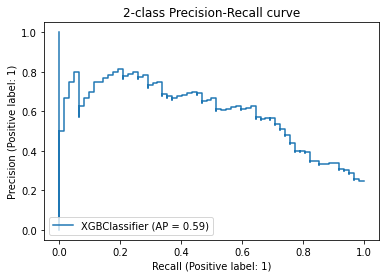

In [ ]:
#2-class Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), XGBClassifier())
classifier.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="XGBClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

# D. Summary

## Key Takes

* Dari seluruh model yang digunakan, Logistic regression memiliki nilai recall tertinggi 84%
* Nilai precision yang didapatkan rendah (39%), hal ini akan mengakibatkan peningkatan pada cost campaign. Akan tetapi, hal ini lebih baik dibanding menghilangkan potensi revenue

## Business Insight

Berdasarkan feature importance : 
 
- Loyalty Program
- Customer Experience via Catalog and Website shopping
- Voucher for minimum spent

## Action items


1. Loyalty Program : Memberikan voucher dan rekomendasi produk untuk customer lama yang tidak berbelanja pada rentang tertentu agar kembali berbelanja
2. Customer Experience via Catalog and Website shopping : Optimalisasi rekomendasi produk berdasarkan most buy dan menawarkan up- selling dan cross selling
3. Voucher for minimum spent : voucher / diskon yang dapat digunakan dalam periode terbatas agar customer kembali berbelanja

